In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/complete_dataset.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df.drop(columns=['date'], inplace=True)

In [ ]:
imputer = SimpleImputer(strategy='mean')
df[['solar_exposure', 'rainfall']] = imputer.fit_transform(df[['solar_exposure', 'rainfall']])

In [ ]:
label_encoder = LabelEncoder()
df['school_day'] = label_encoder.fit_transform(df['school_day'])
df['holiday'] = label_encoder.fit_transform(df['holiday'])

In [ ]:
scaler = StandardScaler()
numerical_cols = ['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative',
                  'frac_at_neg_RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
print(df['school_day'].value_counts())

school_day
1    1453
0     653
Name: count, dtype: int64


In [ ]:
print(df['holiday'].value_counts())

holiday
0    2029
1      77
Name: count, dtype: int64


In [ ]:
print(df.describe())

             demand           RRP  demand_pos_RRP  RRP_positive  \
count  2.106000e+03  2.106000e+03    2.106000e+03  2.106000e+03   
mean  -3.373897e-16 -1.349559e-17    4.993368e-16  1.349559e-17   
std    1.000238e+00  1.000238e+00    1.000238e+00  1.000238e+00   
min   -2.542145e+00 -6.309183e-01   -5.215220e+00 -4.841887e-01   
25%   -7.327774e-01 -2.870043e-01   -6.753951e-01 -2.877886e-01   
50%   -3.270810e-02 -7.282381e-02   -7.034881e-03 -7.445068e-02   
75%    7.566922e-01  1.458767e-01    7.335194e-01  1.428034e-01   
max    3.682747e+00  3.435499e+01    3.469534e+00  3.438636e+01   

       demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
count    2.106000e+03  2.106000e+03     2.106000e+03     2.106000e+03   
mean    -1.349559e-17  8.434743e-18     8.097353e-17     1.754427e-16   
std      1.000238e+00  1.000238e+00     1.000238e+00     1.000238e+00   
min     -2.188809e-01 -1.742915e+01    -2.139236e-01    -2.546508e+00   
25%     -2.188809e-01  1.378820

**Correlation Heatmap**

Key observations:
If demand and solar_exposure are positively correlated, higher solar exposure leads to more demand.

If rainfall and demand have a negative correlation, demand drops on rainy days.

If demand is linked to RRP (Recommended Retail Price), pricing strategies can be optimized.

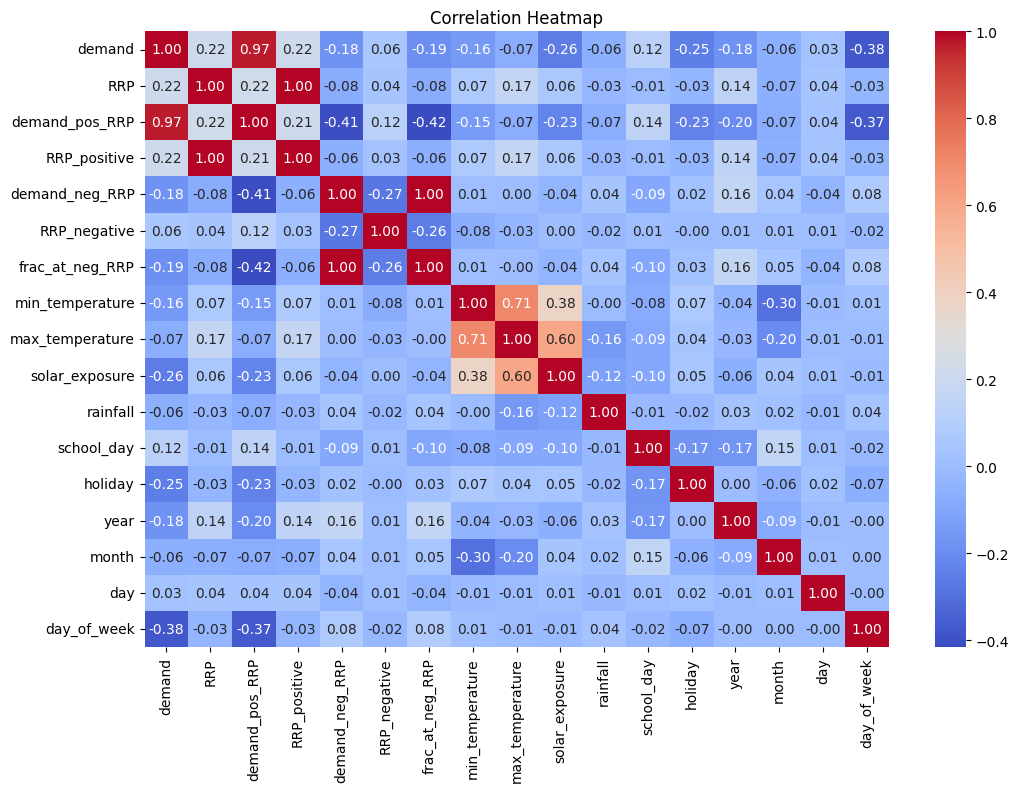

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Feature Distributions (Histogram)**

Histograms help in understanding how data is distributed.

If demand shows multiple peaks, there may be distinct consumer behaviors (e.g., weekdays vs. weekends).

If rainfall is skewed, there may be seasonal effects.

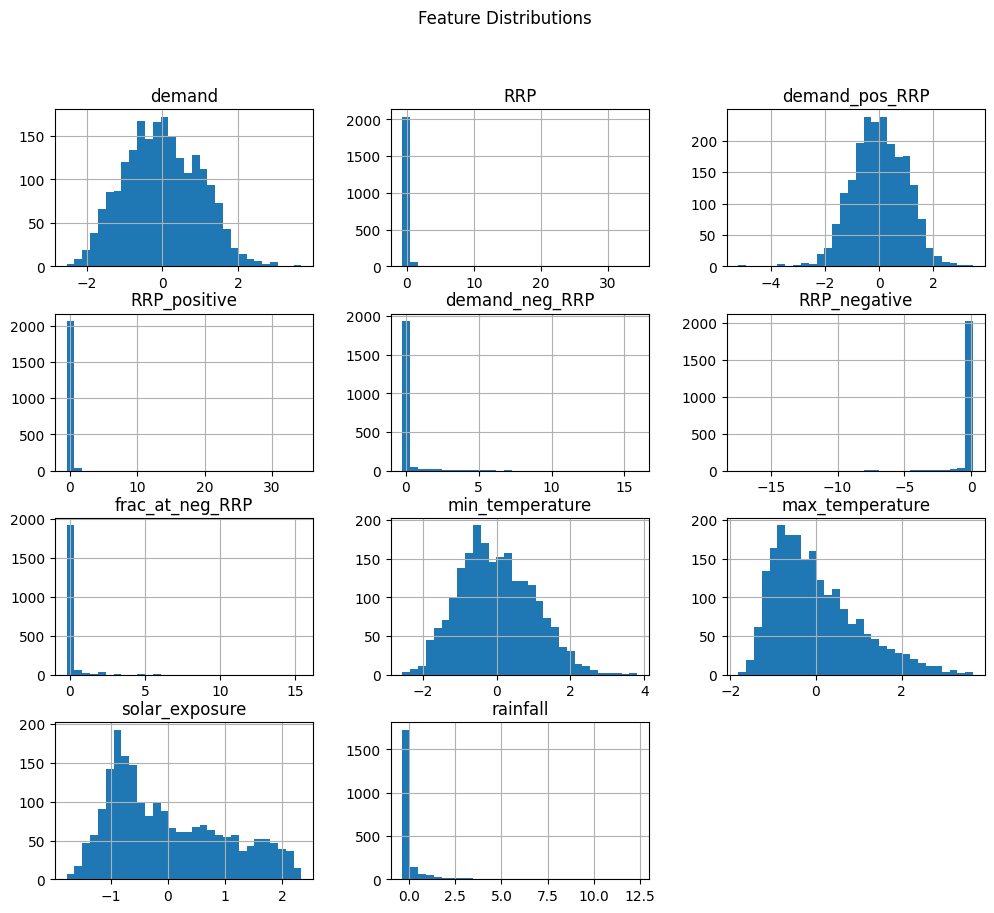

In [ ]:
df[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

**Boxplots (Outlier Detection)**

Boxplots help identify outliers in numerical data.

Outliers in demand or price fluctuations may indicate special events or unexpected market behavior.

Outliers in temperature or rainfall may point to extreme weather conditions affecting demand.

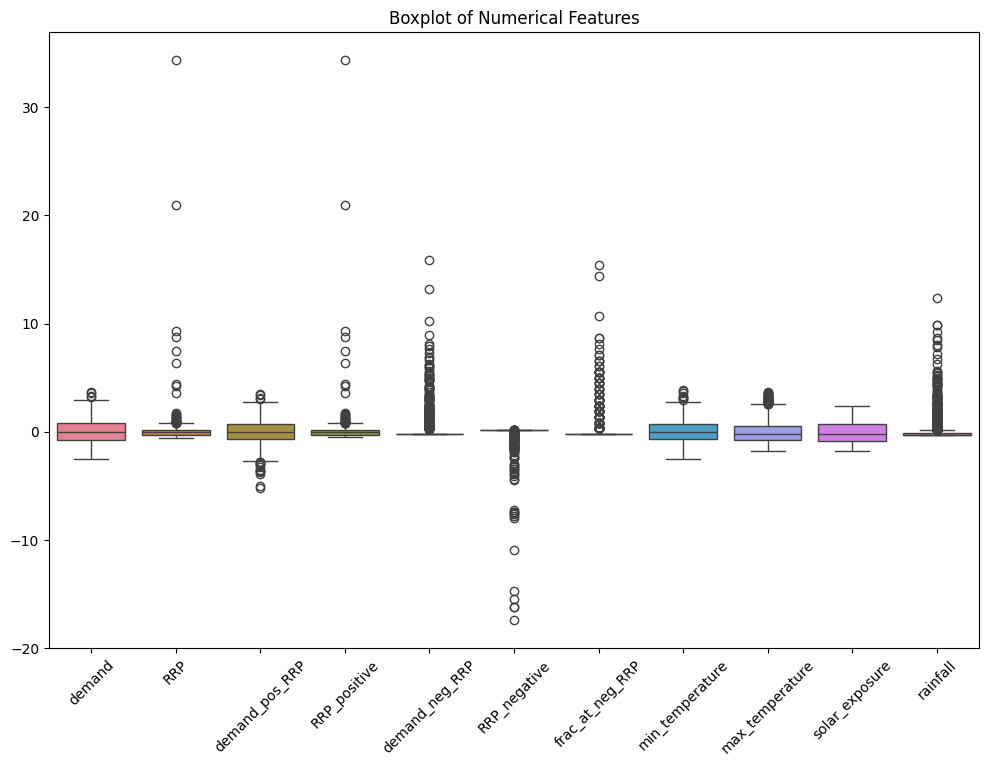

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

# **Months VS Demand**

<ipython-input-18-736cbf77dded>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='demand', ci=None)


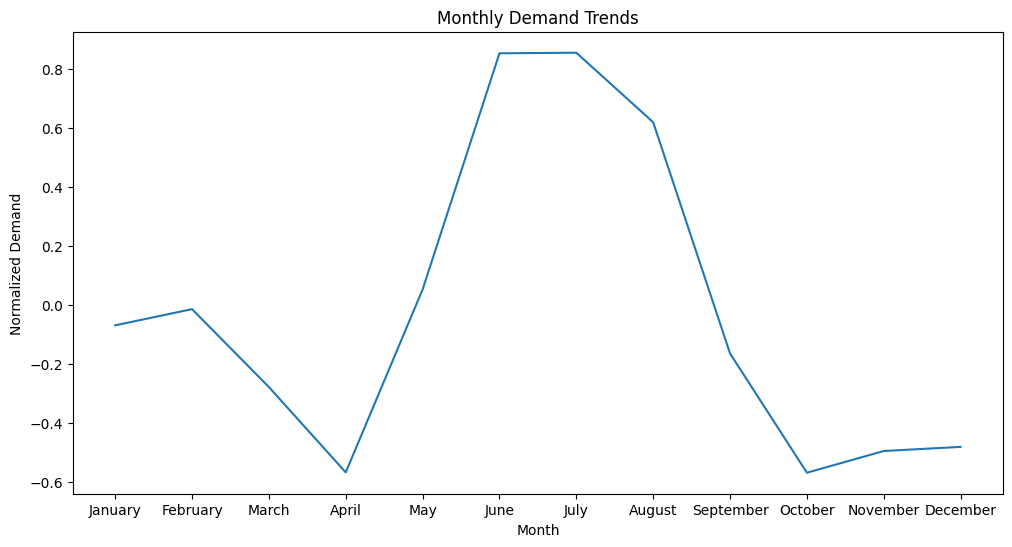

In [ ]:
import calendar

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='demand', ci=None)

# Setting the month names as x-axis labels
plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:13])

plt.title("Monthly Demand Trends")
plt.xlabel("Month")
plt.ylabel("Normalized Demand")
plt.show()


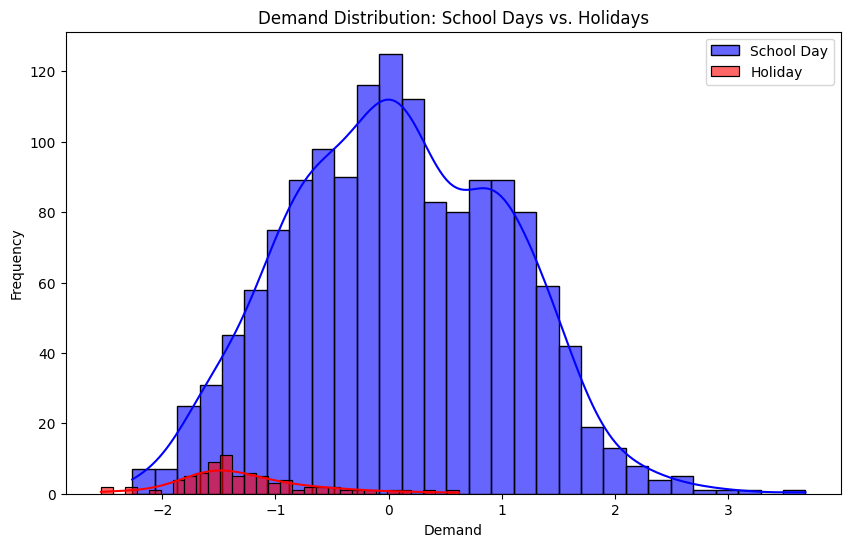

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histograms
sns.histplot(df[df["school_day"] == 1]["demand"], bins=30, kde=True, color="blue", label="School Day", alpha=0.6)
sns.histplot(df[df["holiday"] == 1]["demand"], bins=30, kde=True, color="red", label="Holiday", alpha=0.6)

# Labels & title
plt.xlabel("Demand")
plt.ylabel("Frequency")
plt.title("Demand Distribution: School Days vs. Holidays")
plt.legend()

# Show plot
plt.show()


In [ ]:
print(df.head())

     demand       RRP  demand_pos_RRP  RRP_positive  demand_neg_RRP  \
0 -1.484238 -0.387402       -1.480452     -0.385429        0.428337   
1  0.696306 -0.329764        0.123503     -0.289939        2.163407   
2  1.619898 -0.318814        1.555725     -0.322785       -0.218881   
3 -1.142602 -0.392226       -1.007187     -0.396271       -0.218881   
4 -0.138473 -0.379027       -0.075606     -0.383060       -0.218881   

   RRP_negative  frac_at_neg_RRP  min_temperature  max_temperature  \
0     -0.233766         0.307515         0.398293         1.031747   
1     -2.316317         1.350393         0.885228         2.924481   
2      0.137882        -0.213924         1.951849         2.829049   
3      0.137882        -0.213924         1.093915         0.156954   
4      0.137882        -0.213924         0.792479         0.252386   

   solar_exposure  rainfall  school_day  holiday  year  month  day  \
0        1.115198 -0.349910           0        1  2015      1    1   
1        1.5

**Conclusion**

**Key Insights:**

*Demand & RRP Relationship:*

Electricity demand is strongly correlated with the Regional Reference Price (RRP), indicating that higher demand drives prices up and vice versa.
Factors like peak hours, weather conditions, and real-time pricing mechanisms contribute to this link.

*Impact of Solar Exposure & Temperature:*

Higher solar exposure might reduce demand for heating but increase air conditioning usage.
Temperature extremes (both high and low) typically increase electricity demand.

*School Days vs. Holidays:*

School days generally show more stable demand patterns, driven by routine activities.
Holidays exhibit demand variations, likely influenced by reduced industrial and institutional electricity usage but increased residential consumption.


Understanding these demand patterns helps in better energy planning, pricing strategies, and infrastructure management. Businesses and grid operators can use this data to optimize supply, manage peak loads, and integrate renewable energy sources efficiently.